## Load Modules

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST/Data/", one_hot=True)

/Users/hyunwoogu/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting ./MNIST/Data/train-images-idx3-ubyte.gz
Extracting ./MNIST/Data/train-labels-idx1-ubyte.gz
Extracting ./MNIST/Data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST/Data/t10k-labels-idx1-ubyte.gz


## Hyperparameters

In [8]:
learning_rate  = 0.1
training_epoch = 10
batch_size = 100

n_hidden = 256  
n_input  = 28*28   

## Model

In [5]:
X = tf.placeholder(tf.float32, [None, n_input])

W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [6]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [7]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

## Train

In [9]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('Optimization Completed!')

Epoch: 0001 Avg. cost = 0.2079
Epoch: 0002 Avg. cost = 0.0622
Epoch: 0003 Avg. cost = 0.0506
Epoch: 0004 Avg. cost = 0.0436
Epoch: 0005 Avg. cost = 0.0403
Epoch: 0006 Avg. cost = 0.0383
Epoch: 0007 Avg. cost = 0.0370
Epoch: 0008 Avg. cost = 0.0363
Epoch: 0009 Avg. cost = 0.0359
Epoch: 0010 Avg. cost = 0.0356
Optimization Completed!


## Result

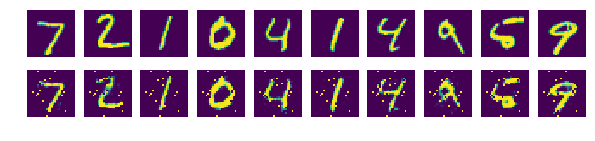

In [10]:
sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()